# **Implement other categories of clustering algorithms, such as hierarchical and density-based clustering**

# 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling
import numpy as np
import pandas as pd
import missingno
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# 2. Importing the data

In this section, I will fetch the data from the Kaggle's project description in the Data section. Since, this is an unsupervised learning method we have only one dataset. The dataset consists of the columns - CustomerID, Gender, Age, Annual Income, and Spending Score. The task is to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [2]:
### Fetching the datsets

dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
### Looking at the sample records of the dataset

dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
### Shape of the dataset

dataset.shape

(200, 5)

The dataset consists of 5 columns and 200 rows.

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - Gender and the numerical columns of the dataset - Age, Annual Income (k$), Spending Score (1-100).

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [5]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here, the column - Gender is categorical. Hence, we will modify the datatype of this column to category.

In [6]:
### Changing the datatype of the column - Gender to category

dataset.Pclass = dataset.Gender.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [7]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here, we can see that there are no missing values in the columns.

<AxesSubplot:>

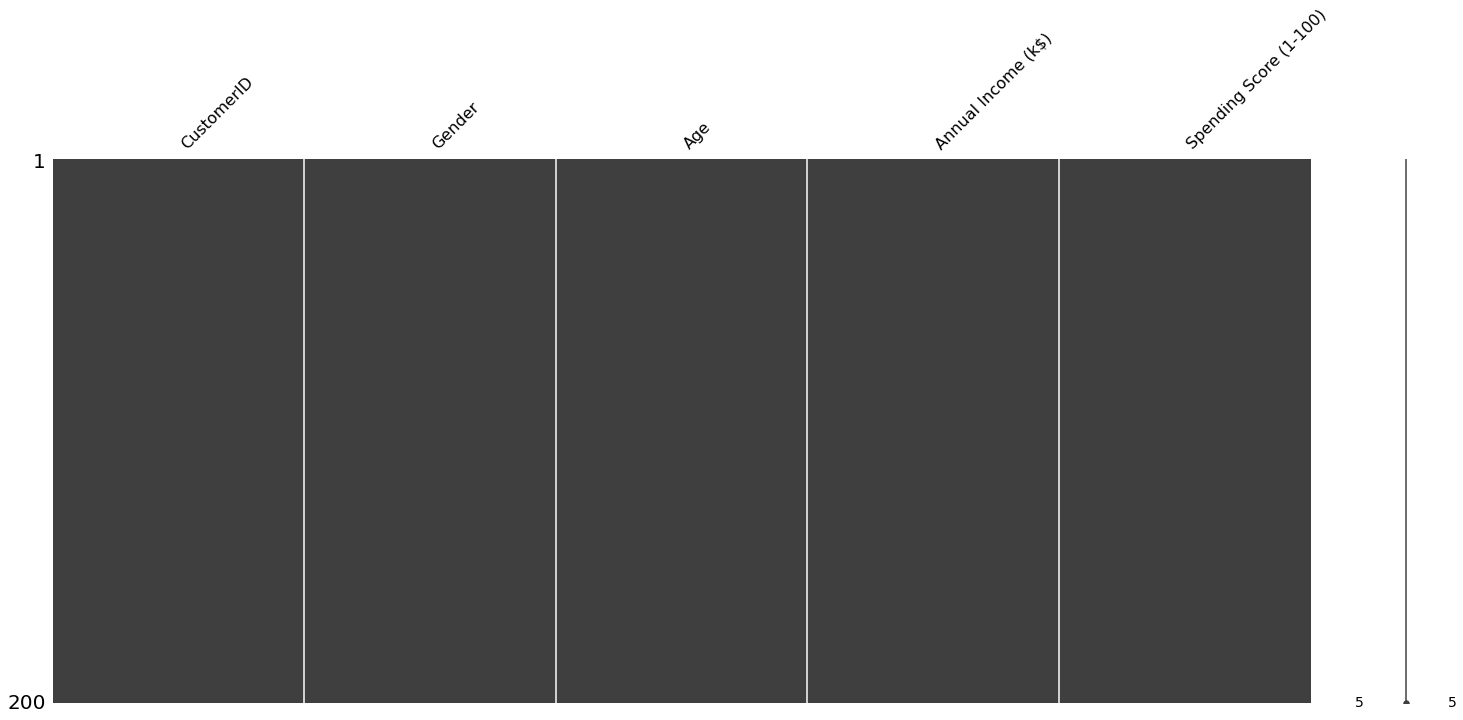

In [8]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [9]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
### Value counts of the column - Gender

gender_count = dataset['Gender'].value_counts(dropna = False)
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

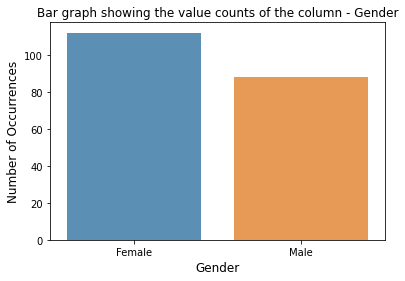

In [12]:
### Bar graph showing the value counts of the column - Gender

sns.barplot(gender_count.index, gender_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customers' of the mall are Female. Now let's see the average Annual Income for each Gender.

In [13]:
### Mean of Annual Income by Gender

gender_income = dataset[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


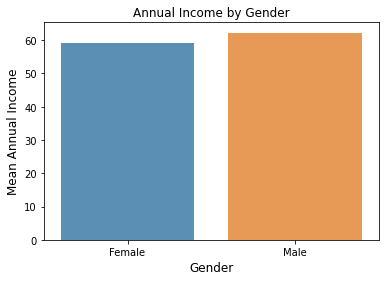

In [14]:
### Mean Annual Income by Gender

sns.barplot(gender_income['Gender'], gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the average annual income is almost similar for both Male and Female.

In [15]:
### Mean Spending Score by Gender

gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


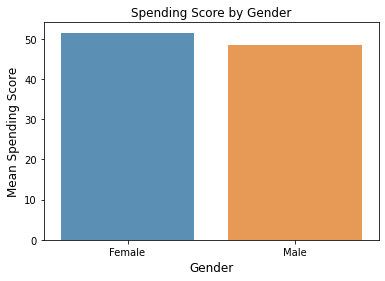

In [16]:
### Mean Spending Score by Gender

sns.barplot(gender_score['Gender'], gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the mean spending score is slightly higher in Female than Male.

In [17]:
### Mean Age by Gender

gender_age = dataset[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


##### 3.2.3 Numerical variable - Annual Income (k$)

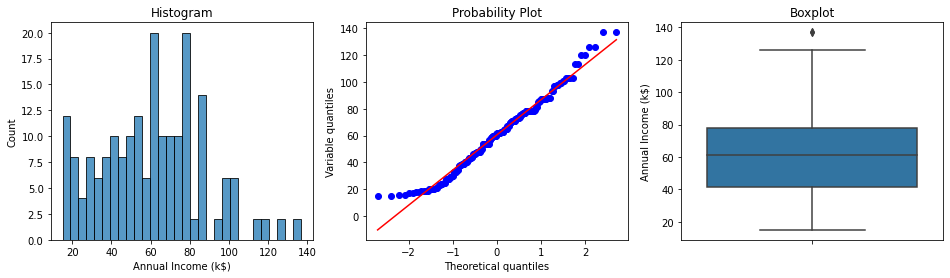

In [22]:
### Understanding the distribution of the column - Annual Income (k$)

diagnostic_plots(dataset, 'Annual Income (k$)')

From the above graph, we can see that the data has a slight degree of skewness and a hint of an outlier.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

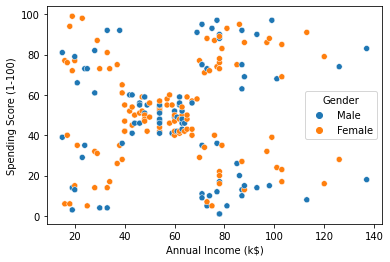

In [23]:
### Scatterplot between Annual Income and Spending Score

sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

From the above graph, we can see the formation of clusters in the data. We will take a look at it using K-Means clustering later in the notebook.

From the above graph, we can see that the data is slightly skewed and there are no outliers.

# 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [25]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


From the above cell, we can see that there are no significant outliers in the dataset.

#### 4.2 Drop and fill missing values

Since the dataset has no missing values, we will focus on removing the counter column - CustomerID.

In [26]:
### Dropping the columns - CustomerId from the dataset

dataset.drop(['CustomerID'], axis = 1, inplace = True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# 5. Clustering

Here, we will use K-Means and Hierarchial clustering for customer segmentation based on:

1. Age and Spending Score
2. Annual Income and Spending Score
3. Age, Annual Income, and Spending Score

We then select the best model for segmentation using the Silhouette and Calinski Harabasz Scores.

#### 5.1 Segmentation using Age and Spending Score (K- Means)

In [27]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

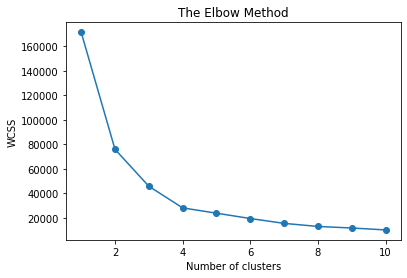

In [28]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 4.

In [29]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

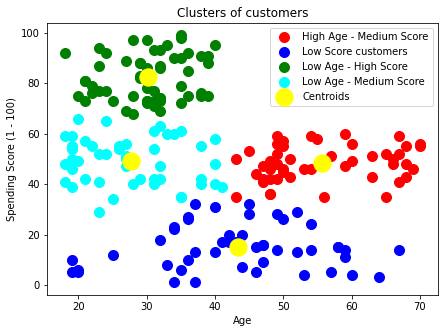

In [30]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 5 clusters.

1. High Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to 40+ age group and have a 35 - 60 spending score.
2. Low Score customers: These are the customers that do not spend a lot in the mall. The target of the mall should be to reduce the number of customers in the blue cluster.
3. Low Age - High Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age group and have a spending score greater than 70.
4. Low Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age and have a spending score in the range of 35 and 65.

#### 5.2 Segmentation using Age and Spending Score (Hierarchial clustering)

In [32]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

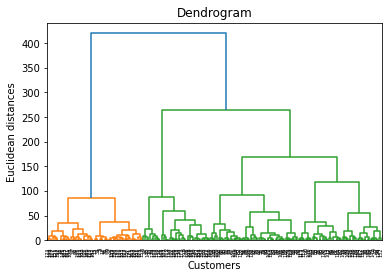

In [33]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 2.

In [34]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

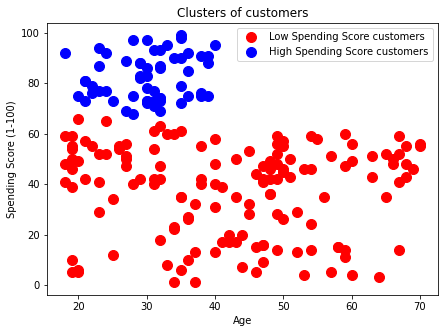

In [35]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 2 clusters.

1. Low Spending Score customers: From the above graph, we can see that these are the customers with low spending score. 
2. High Spending Score customers: From the above graph, we can see that these are the customers with high spending score. 

The ideal scenario for the mall should be to reduce the number of customers in the red cluster and increase the number of clusters.

From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

#### 5.4 Segmentation using Annual Income and Spending Score (Hierarchial clustering)

In [43]:
### Filtering the annual income and spending score from the dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

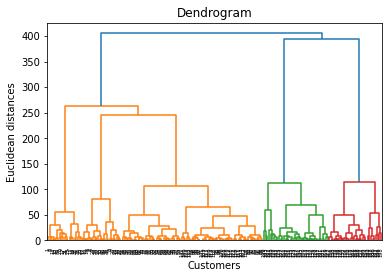

In [44]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

#### 5.5 Segmentation using Age, Annual Income, and Spending Score (K-Means)

In [51]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

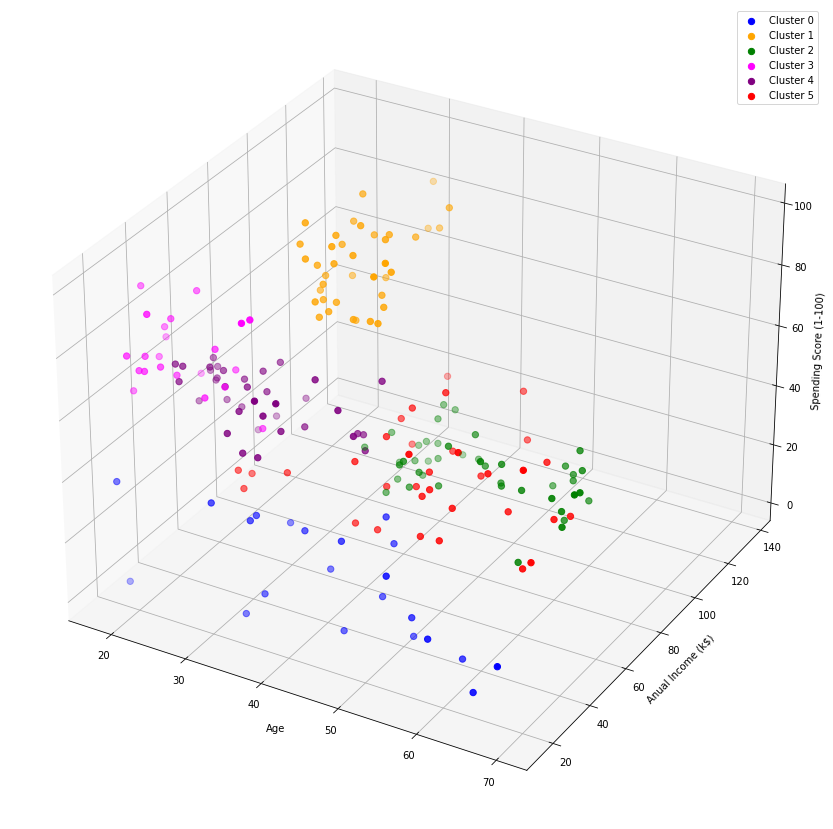

In [52]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

#### 5.6 Segmentation using Age, Annual Income, and Spending Score (Hierarchial Clustering)

In [54]:
### Filtering the age, annual income and spending score from the dataset

X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

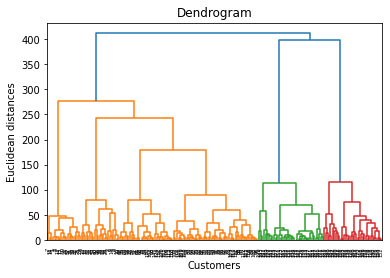

In [55]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

In [56]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

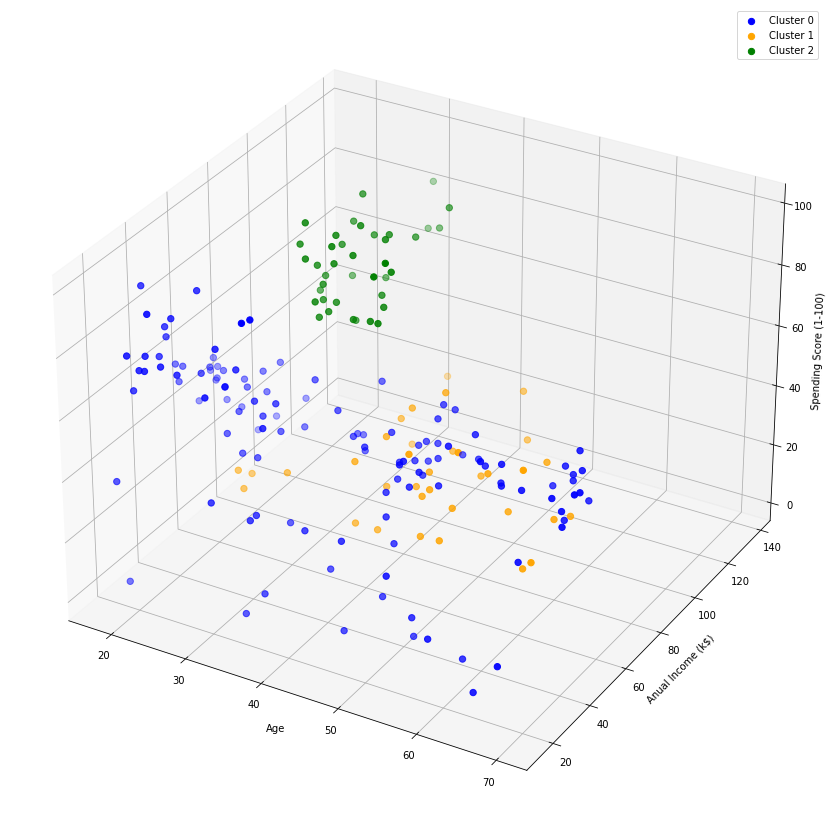

In [57]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

# 6. Conclusion

Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.